In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../4NM21AI012/datasets/breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['diagnosis'] = encoder.fit_transform(df['diagnosis'])

In [5]:
x = df.iloc[:,2:32]
y = df.iloc[:,1]

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train=sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [8]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense

In [27]:
classifier = Sequential([
        Dense(16, input_dim = x.shape[1], activation='relu'),
        Dense(8, activation = 'relu'),
        Dense(1, activation='sigmoid')
])

In [28]:
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy',metrics=['accuracy'])

In [29]:
history = classifier.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/100
14/14 [==============================] - 0s 7ms/step - loss: 0.8193 - accuracy: 0.3897 - val_loss: 0.7403 - val_accuracy: 0.4615
Epoch 2/100
14/14 [==============================] - 0s 1ms/step - loss: 0.7128 - accuracy: 0.5023 - val_loss: 0.6585 - val_accuracy: 0.5734
Epoch 3/100
14/14 [==============================] - 0s 4ms/step - loss: 0.6338 - accuracy: 0.6362 - val_loss: 0.5962 - val_accuracy: 0.6713
Epoch 4/100
14/14 [==============================] - 0s 3ms/step - loss: 0.5715 - accuracy: 0.7230 - val_loss: 0.5458 - val_accuracy: 0.7832
Epoch 5/100
14/14 [==============================] - 0s 2ms/step - loss: 0.5197 - accuracy: 0.7958 - val_loss: 0.5030 - val_accuracy: 0.8392
Epoch 6/100
14/14 [==============================] - 0s 2ms/step - loss: 0.4751 - accuracy: 0.8568 - val_loss: 0.4653 - val_accuracy: 0.8671
Epoch 7/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4360 - accuracy: 0.8873 - val_loss: 0.4309 - val_accuracy: 0.8741
Epoch 8/100
1

In [30]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

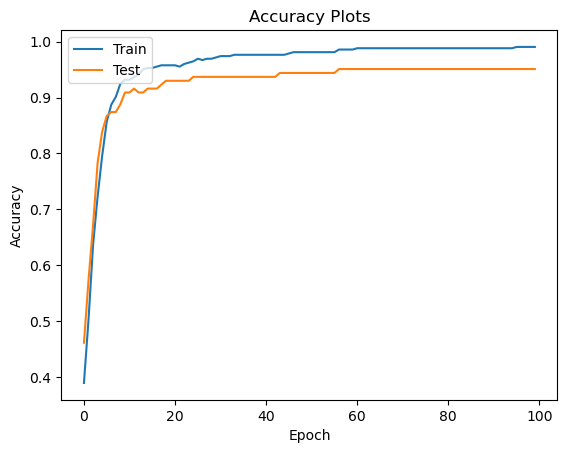

In [31]:
plt.plot(training_accuracy)
plt.plot(validation_accuracy)
plt.title('Accuracy Plots')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

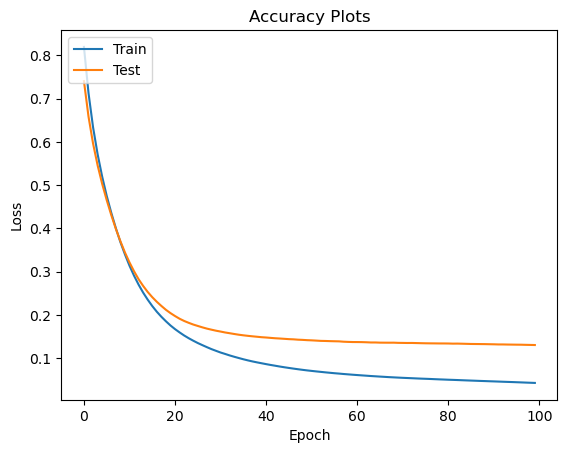

In [32]:
plt.plot(training_loss)
plt.plot(validation_loss)
plt.title('Accuracy Plots')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()